In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = pd.read_csv('/content/SP500_2011_2025.csv')
df.sample(5)

,Date,Close,High,Low,Open,Volume
1124,23-06-2015,2124.199951,2128.030029,2119.889893,2123.159912,3091190000
2912,29-07-2022,4130.290039,4140.149902,4079.219971,4087.330078,4616360000
2965,13-10-2022,3669.909912,3685.409912,3491.580078,3520.370117,5021680000
979,21-11-2014,2063.500000,2071.459961,2056.750000,2057.459961,3916420000
662,21-08-2013,1642.800049,1656.989990,1639.430054,1650.660034,2932180000


Diversity of the dataset

In [237]:
df.tail(5)

,Date,Close,High,Low,Open,Volume
3721,20-10-2025,6735.129883,6744.350098,6690.049805,6690.049805,4672170000
3722,21-10-2025,6735.350098,6752.160156,6722.029785,6736.750000,5245020000
3723,22-10-2025,6699.399902,6741.750000,6655.689941,6741.339844,5710010000
3724,23-10-2025,6738.439941,6749.529785,6700.140137,6703.649902,5565750000
3725,24-10-2025,6791.689941,6807.109863,6772.069824,6772.069824,5058220000


In [238]:
print(df.rpow)

<bound method DataFrame.rpow of             Date        Close         High          Low         Open  \
0     03-01-2011  1271.869995  1276.170044  1257.619995  1257.619995   
1     04-01-2011  1270.199951  1274.119995  1262.660034  1272.949951   
2     05-01-2011  1276.560059  1277.630005  1265.359985  1268.780029   
3     06-01-2011  1273.849976  1278.170044  1270.430054  1276.290039   
4     07-01-2011  1271.500000  1276.829956  1261.699951  1274.410034   
...          ...          ...          ...          ...          ...   
3721  20-10-2025  6735.129883  6744.350098  6690.049805  6690.049805   
3722  21-10-2025  6735.350098  6752.160156  6722.029785  6736.750000   
3723  22-10-2025  6699.399902  6741.750000  6655.689941  6741.339844   
3724  23-10-2025  6738.439941  6749.529785  6700.140137  6703.649902   
3725  24-10-2025  6791.689941  6807.109863  6772.069824  6772.069824   

          Volume  
0     4286670000  
1     4796420000  
2     4764920000  
3     4844100000  
4     49

In [239]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3726 non-null   object 
 1   Close   3726 non-null   float64
 2   High    3726 non-null   float64
 3   Low     3726 non-null   float64
 4   Open    3726 non-null   float64
 5   Volume  3726 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 174.8+ KB
None


In [240]:

df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [241]:

df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [242]:
print("\n--- Missing Value Count After Date/Type Conversion (by column) ---")
print(df.isnull().sum())


--- Missing Value Count After Date/Type Conversion (by column) ---
date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64


In [243]:
df_clean = df.dropna(subset=['close', 'open', 'high', 'low', 'volume']).copy()

In [244]:
print(df_clean.isnull().sum())

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64


Filter out stocks with very few data points, which might be new listings

Calculate daily log returns for each stock.

In [245]:
df_clean['log_return'] = np.log(df['close'] / df['close'].shift(1))

In [246]:
print(df_clean['log_return'])

0            NaN
1      -0.001314
2       0.004995
3      -0.002125
4      -0.001846
          ...   
3721    0.010616
3722    0.000033
3723   -0.005352
3724    0.005810
3725    0.007871
Name: log_return, Length: 3726, dtype: float64


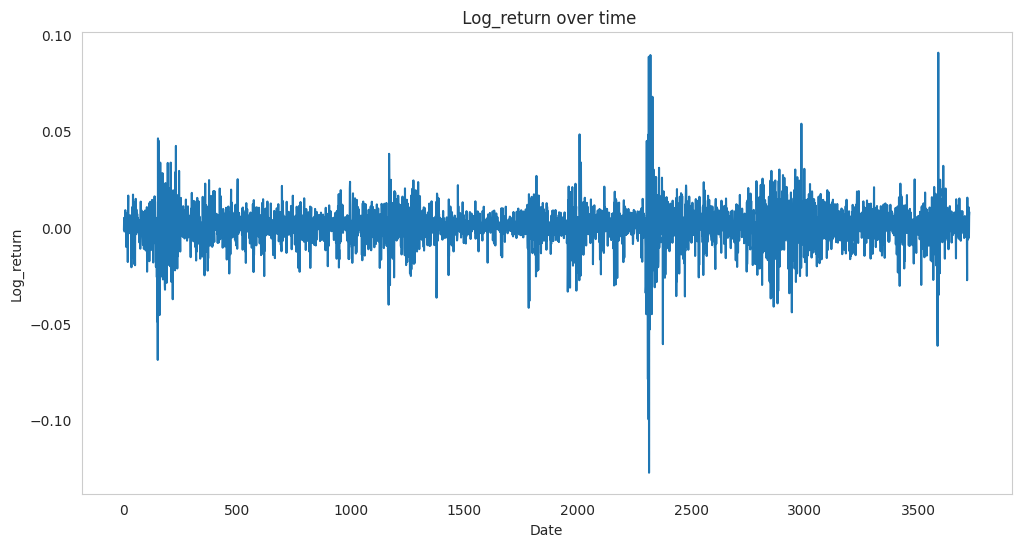

In [247]:
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['log_return'])
plt.title(' Log_return over time')
plt.xlabel('Date')
plt.ylabel('Log_return')
plt.grid(False)
plt.show()

 To represent the *overall market volatility*, we calculate the equal-weighted average return across all included stocks for each day.

In [248]:
 # Data Aggregation : Calculate Equal-Weighted Index Log Returns,
    # Average Volume, and Index Close Price
# ---------------------------------------------
#  Create Market-Level Index for Volatility Modeling
# ---------------------------------------------
df_index = df_clean.copy()
df_index.set_index('date', inplace=True)

print(f"Initial preparation complete. Index series length: {len(df_index)}")

print("\n--- Index Data Sample ---")
print(df_index.head())
print(f"Initial preparation complete. Index series length: {len(df_index)}")

Initial preparation complete. Index series length: 3726

--- Index Data Sample ---
                  close         high          low         open      volume  \
date                                                                         
2011-01-03  1271.869995  1276.170044  1257.619995  1257.619995  4286670000   
2011-01-04  1270.199951  1274.119995  1262.660034  1272.949951  4796420000   
2011-01-05  1276.560059  1277.630005  1265.359985  1268.780029  4764920000   
2011-01-06  1273.849976  1278.170044  1270.430054  1276.290039  4844100000   
2011-01-07  1271.500000  1276.829956  1261.699951  1274.410034  4963110000   

            log_return  
date                    
2011-01-03         NaN  
2011-01-04   -0.001314  
2011-01-05    0.004995  
2011-01-06   -0.002125  
2011-01-07   -0.001846  
Initial preparation complete. Index series length: 3726


In [249]:
df_index.sample(5).head()

,close,high,low,open,volume,log_return
date,,,,,,
2024-03-08,5123.689941,5189.259766,5117.500000,5164.459961,4208870000,-0.006550
2019-04-15,2905.580078,2909.600098,2896.479980,2908.320068,3114530000,-0.000630
2024-12-12,6051.250000,6079.680176,6051.250000,6074.290039,3678010000,-0.005429
2017-09-19,2506.649902,2507.840088,2503.189941,2506.290039,3253760000,0.001110
2020-10-22,3453.489990,3460.530029,3415.340088,3438.500000,4172060000,0.005205


In [250]:
!pip install ta

In [251]:
import ta
# ---------------------------------------------
#  Realized Volatility Calculation
# ---------------------------------------------
VOLATILITY_WINDOW = 21  # ~1 month - Number of trading days (approx. 1 month) for realized volatility

#  Realized Volatility: Rolling standard deviation of returns
df_index['realized_volatility'] = df_index['log_return'].rolling(window=VOLATILITY_WINDOW).std()


In [252]:
df_index['realized_volatility'].sample(20)

,realized_volatility
date,
2013-12-11,0.005224
2020-05-13,0.017818
2025-09-29,0.004768
2011-07-20,0.009628
2016-03-04,0.011660
2025-09-23,0.004575
2013-06-18,0.008434
2024-04-26,0.007956
2022-01-03,0.010232


  Target Definition: The volatility realized over the *next* VOLATILITY_WINDOW days.
   We shift the realized_volatility series back one day to represent the target for the next trading period (t+1)

In [253]:
df_index['target_volatility'] = df_index['realized_volatility'].shift(-1)

 Lagged Volatility (The single strongest predictor)


 The volatility realized up to and including the current day (t-21 to t).

In [254]:
df_index['lagged_volatility'] = df_index['realized_volatility'].shift(1)


In [255]:
print("\n--- Volatility Samples ---")
print(df_index[['realized_volatility', 'target_volatility', 'lagged_volatility']].head(25))



--- Volatility Samples ---
            realized_volatility  target_volatility  lagged_volatility
date                                                                 
2011-01-03                  NaN                NaN                NaN
2011-01-04                  NaN                NaN                NaN
2011-01-05                  NaN                NaN                NaN
2011-01-06                  NaN                NaN                NaN
2011-01-07                  NaN                NaN                NaN
2011-01-10                  NaN                NaN                NaN
2011-01-11                  NaN                NaN                NaN
2011-01-12                  NaN                NaN                NaN
2011-01-13                  NaN                NaN                NaN
2011-01-14                  NaN                NaN                NaN
2011-01-18                  NaN                NaN                NaN
2011-01-19                  NaN                NaN            

Historical Returns (Lagged Daily Returns)

In [256]:
# Lagged Returns Features
# ---------------------------------------------
for lag in [1, 2, 5, 10]:
    df_index[f'return_lag_{lag}'] = df_index['log_return'].shift(lag)


Technical Indicators (TA) on the index mean close price

In [257]:
# Relative Strength Index (RSI)
df_index['RSI'] = ta.momentum.rsi(df_index['close'], window=14)

# Moving Average Convergence Divergence (MACD)
macd_result = ta.trend.MACD(df_index['close'], window_fast=12, window_slow=26, window_sign=9)
df_index['MACD_Diff'] = macd_result.macd_diff() # Histogram

# Bollinger Bands Percentage (%B) - Measures price location relative to band edges
bb = ta.volatility.BollingerBands(df_index['close'], window=20, window_dev=2)
df_index['BB_percent'] = bb.bollinger_pband()

#  External Feature Proxy: Log Volume
df_index['log_avg_volume'] = np.log(df_index['volume'])

#  Volatility Feature: Change in Volatility
df_index['volatility_change'] = df_index['lagged_volatility'].diff(1)

In [258]:
df_ml = df_index.dropna().copy()

In [259]:
df_ml.sample(5)

,close,high,low,open,volume,log_return,realized_volatility,target_volatility,lagged_volatility,return_lag_1,return_lag_2,return_lag_5,return_lag_10,RSI,MACD_Diff,BB_percent,log_avg_volume,volatility_change
date,,,,,,,,,,,,,,,,,,
2012-12-07,1418.069946,1420.339966,1410.900024,1413.949951,3125160000,0.002917,0.007400,0.006771,0.009140,0.003301,0.001584,0.000162,0.012942,56.546026,3.975828,0.791308,21.862751,-0.000146
2013-03-26,1563.770020,1563.949951,1551.689941,1551.689941,2869260000,0.007755,0.005225,0.005190,0.006778,-0.003346,0.007149,-0.002425,-0.002406,62.246772,-0.910469,0.797594,21.777320,-0.000114
2019-10-22,2995.989990,3014.570068,2995.040039,3010.729980,3527540000,-0.003575,0.008955,0.008755,0.008916,0.006848,-0.003927,0.009906,-0.015683,55.940561,6.116609,0.761882,21.983867,0.000067
2013-09-25,1692.770020,1701.709961,1691.880005,1698.020020,3148730000,-0.002743,0.006361,0.005036,0.006405,-0.002601,-0.004731,0.012104,0.003048,54.278737,1.769013,0.621210,21.870265,0.000023
2018-01-02,2695.810059,2695.889893,2682.360107,2683.729980,3397430000,0.008269,0.003848,0.003968,0.003837,-0.005197,0.001832,-0.000458,0.008934,68.243529,-1.328076,0.853398,21.946285,0.000244


In [260]:

# ---------------------------------------------
# Final ML Dataset Preparation
# ---------------------------------------------
df_ml = df_index.dropna().copy()

FEATURES = [
    'lagged_volatility',
    'return_lag_1', 'return_lag_2', 'return_lag_5', 'return_lag_10',
    'RSI', 'MACD_Diff', 'BB_percent', 'log_avg_volume', 'volatility_change'
]
TARGET = 'target_volatility'

print("\n--- Final ML-Ready DataFrame ---")
print(f"Total samples available: {df_ml.shape[0]}")
print(f"Number of features (X): {len(FEATURES)}")
print(f"Target variable (y): {TARGET}")
print("\nFeatures used for prediction (X):")
print(FEATURES)
print("\nFirst 5 rows of final dataset:")
print(df_ml[FEATURES + [TARGET]].head())



--- Final ML-Ready DataFrame ---
Total samples available: 3692
Number of features (X): 10
Target variable (y): target_volatility

Features used for prediction (X):
['lagged_volatility', 'return_lag_1', 'return_lag_2', 'return_lag_5', 'return_lag_10', 'RSI', 'MACD_Diff', 'BB_percent', 'log_avg_volume', 'volatility_change']

First 5 rows of final dataset:
            lagged_volatility  return_lag_1  return_lag_2  return_lag_5  \
date                                                                      
2011-02-18           0.006351      0.003071      0.006238      0.005492   
2011-02-22           0.006303      0.001923      0.003071      0.002382   
2011-02-23           0.008059     -0.020742      0.001923     -0.003240   
2011-02-24           0.008136     -0.006131     -0.020742      0.006238   
2011-02-25           0.008143     -0.000995     -0.006131      0.003071   

            return_lag_10        RSI  MACD_Diff  BB_percent  log_avg_volume  \
date                                  

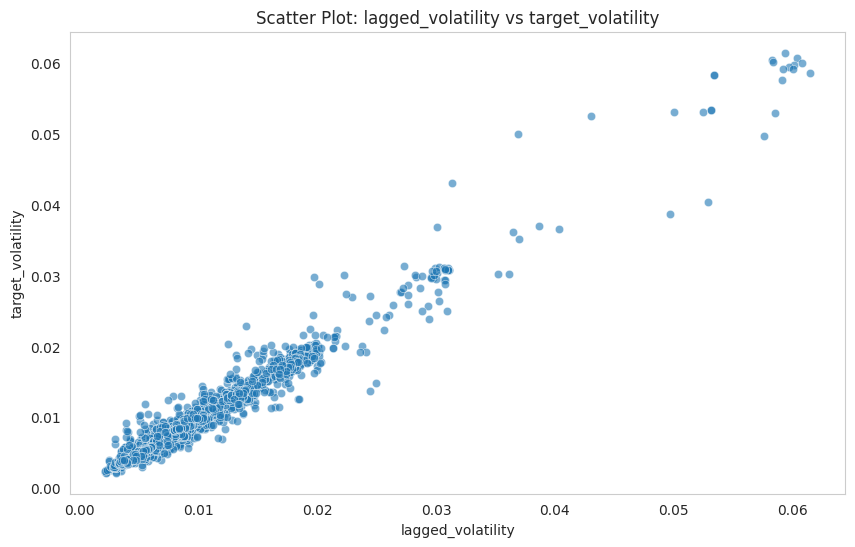

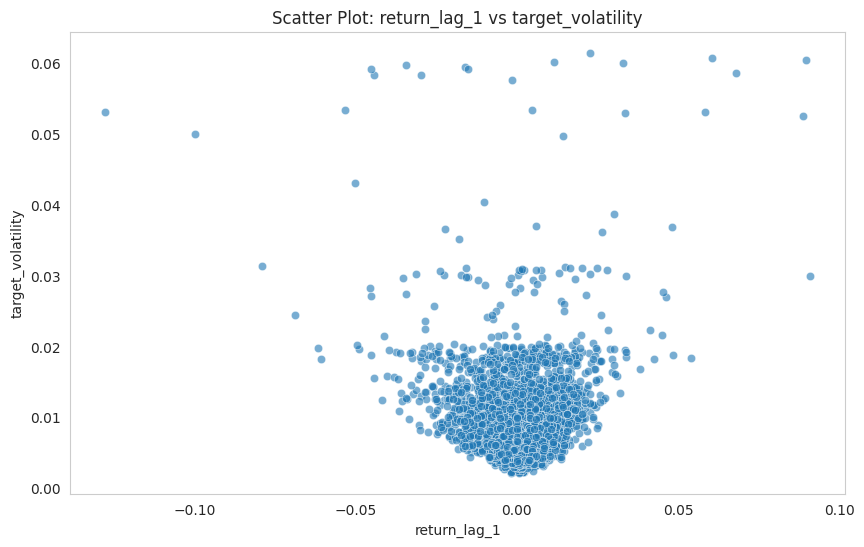

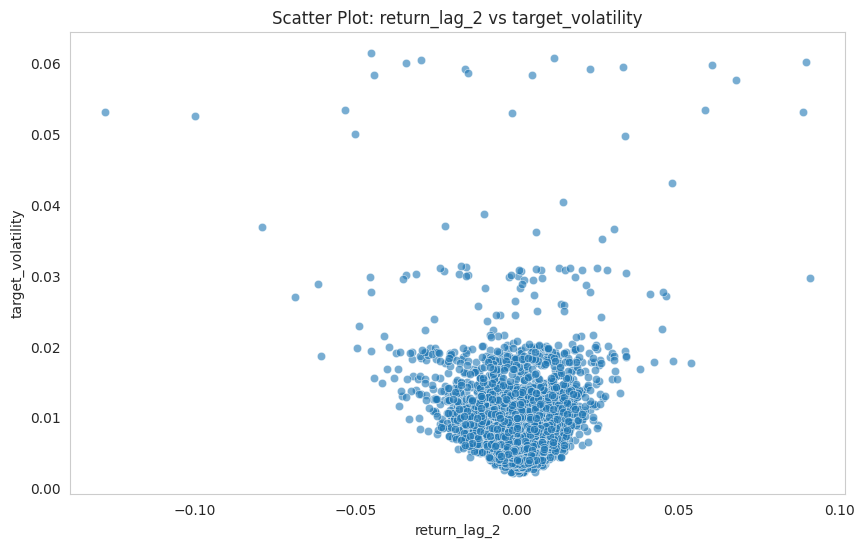

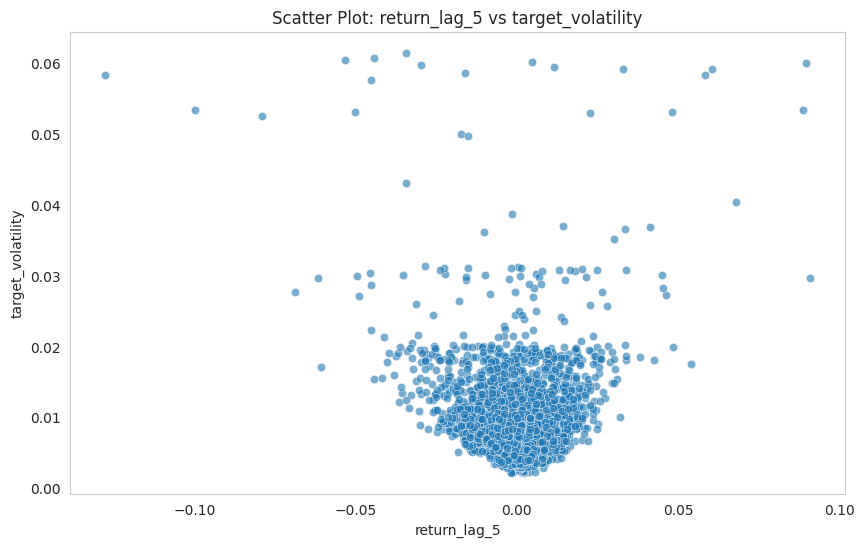

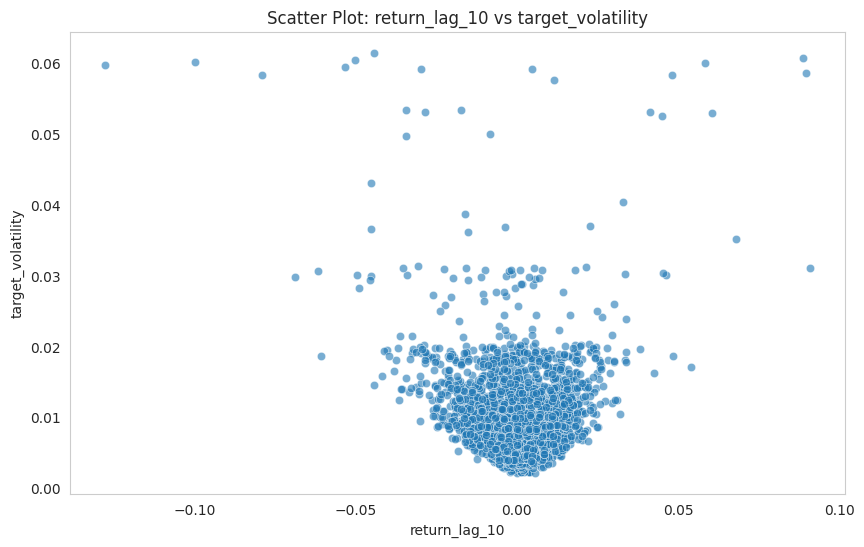

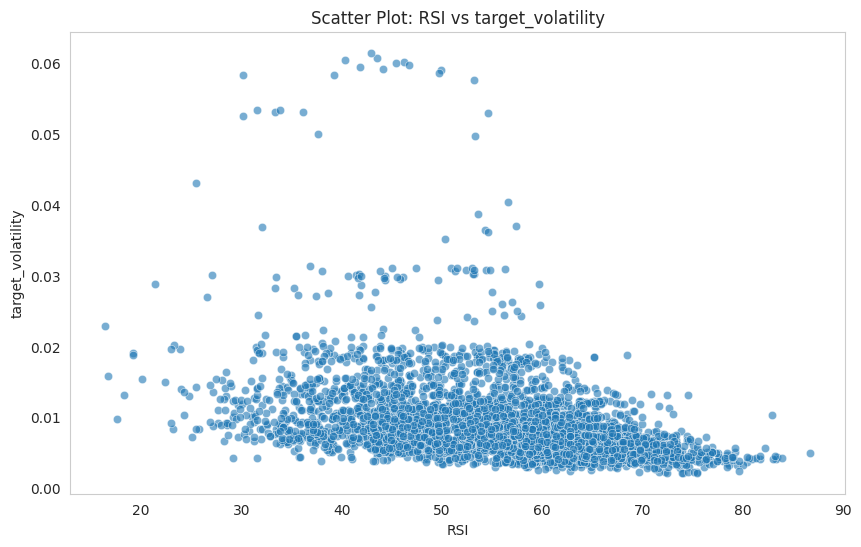

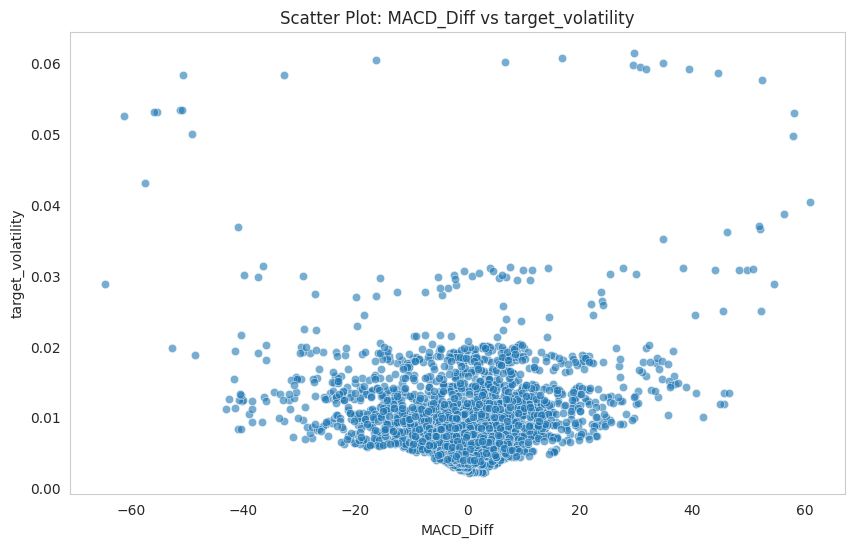

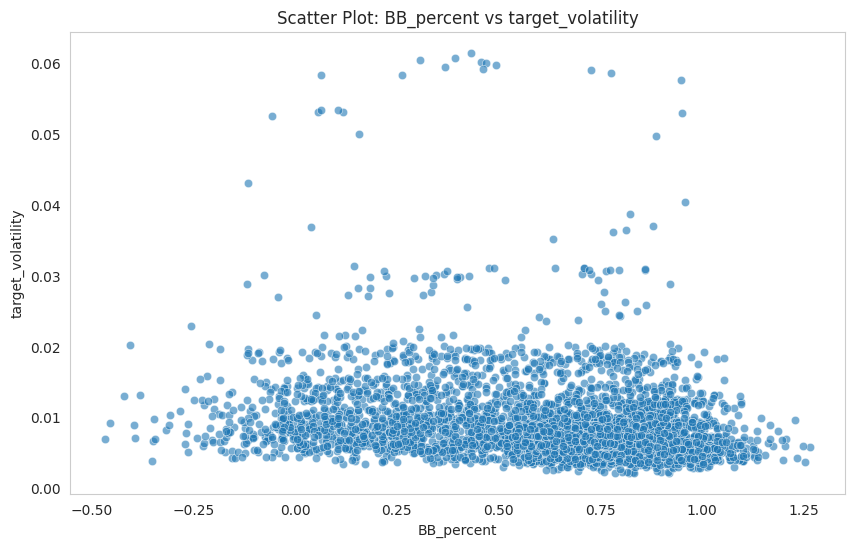

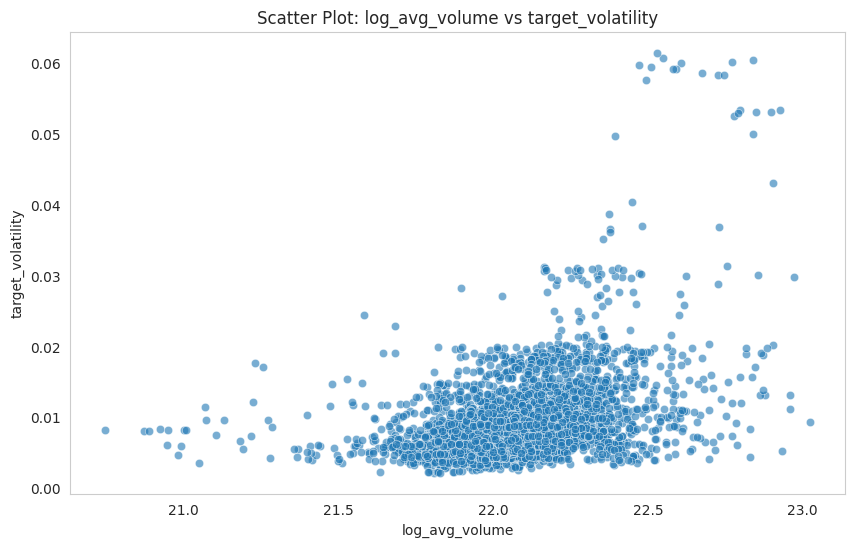

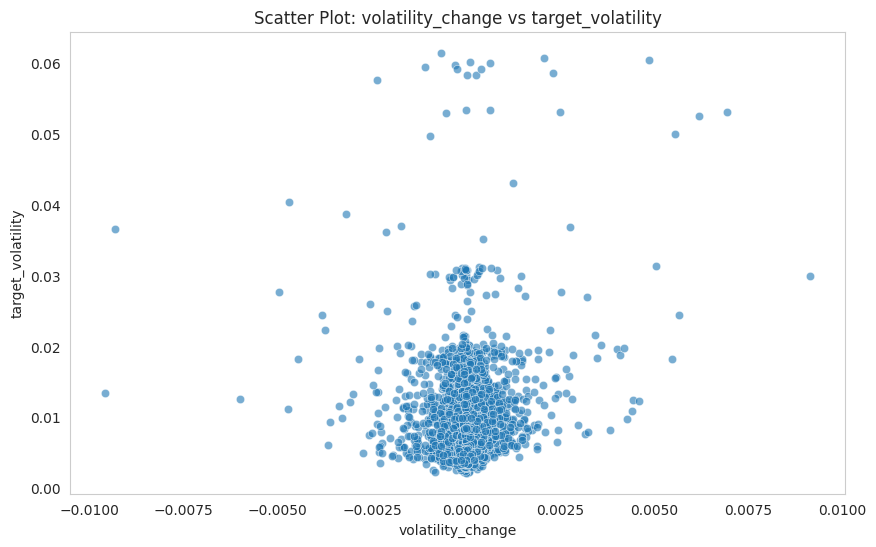

In [261]:
# Visualization: Scatter plots
# ---------------------------------------------
for feature in FEATURES:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ml, x=feature, y=TARGET, alpha=0.6)
    plt.title(f'Scatter Plot: {feature} vs {TARGET}')
    plt.xlabel(feature)
    plt.ylabel(TARGET)
    plt.grid(False)
    plt.show()


--- Generating Focused Pairplot for Key Feature Analysis ---

--- Generating Focused Pairplot for Key Feature Analysis ---


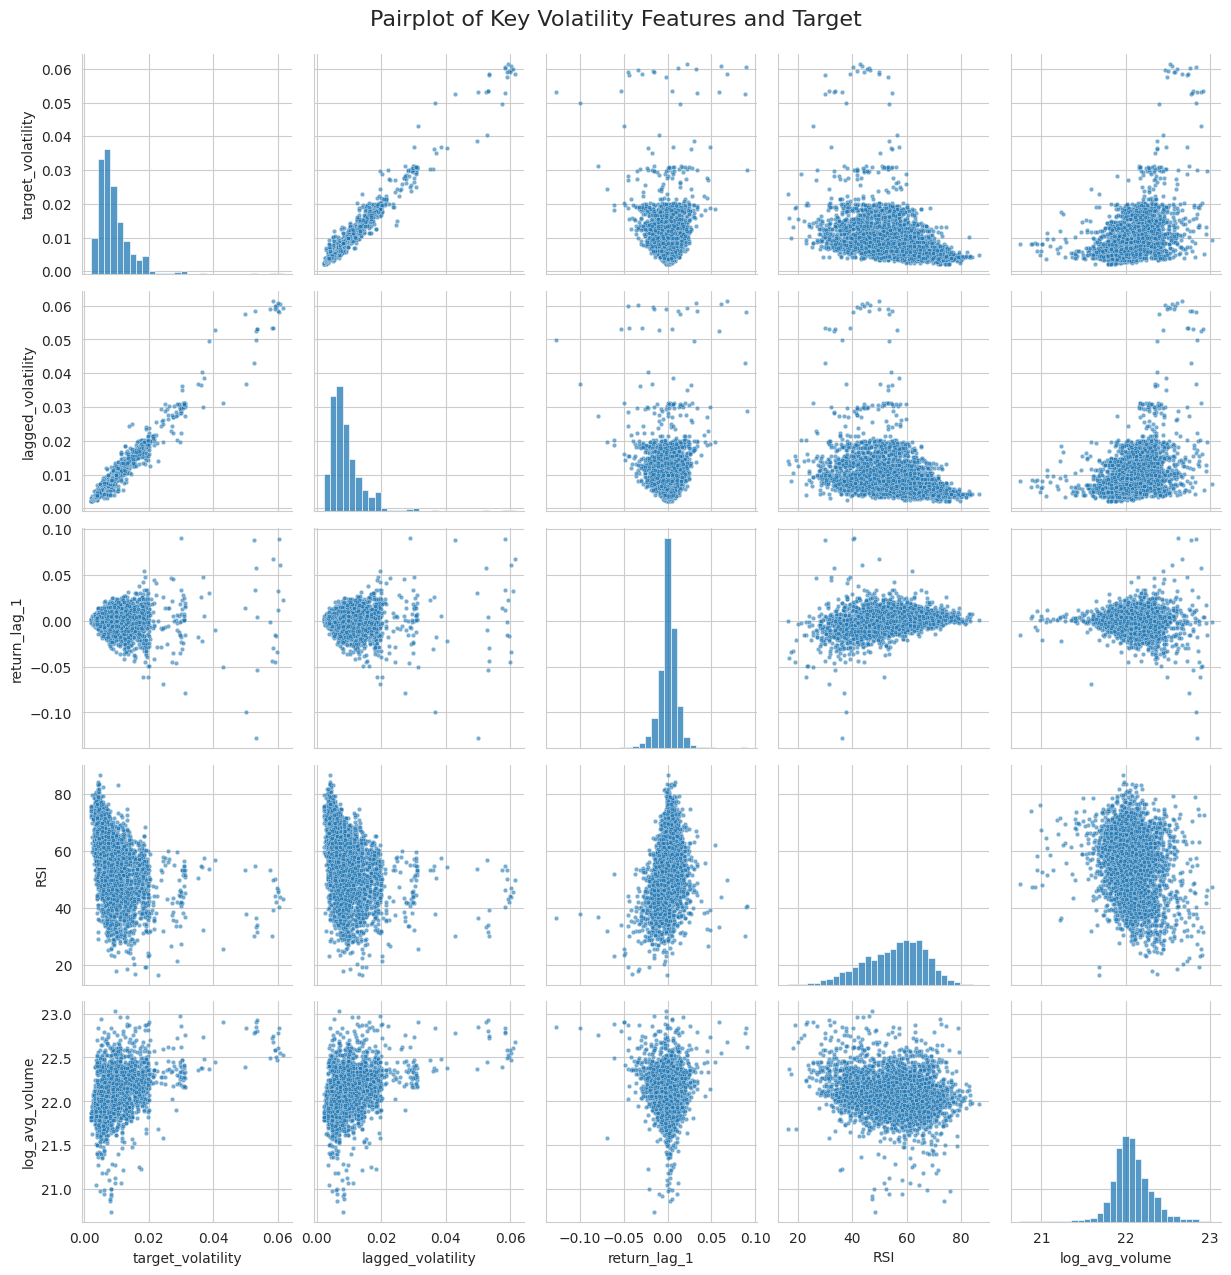


--- Generating Correlation Heatmap ---


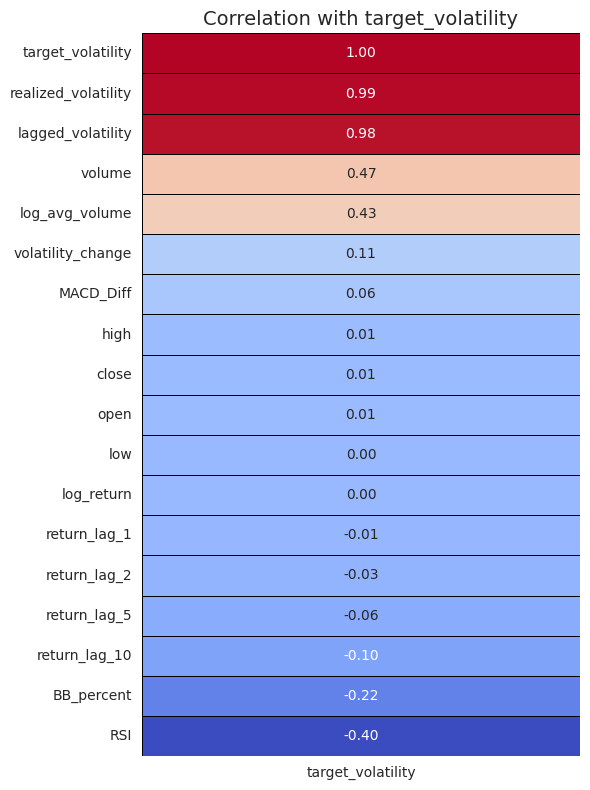

Correlation Heatmap saved as 'target_correlation_heatmap.png'.

 Visualization and data preparation complete.

Visualization steps complete. Analyze 'key_feature_pairplot.png' and 'target_correlation_heatmap.png'.


In [262]:
print("\n--- Generating Focused Pairplot for Key Feature Analysis ---")

#  Pairplot of Key Features
# ---------------------------------------------
print("\n--- Generating Focused Pairplot for Key Feature Analysis ---")

pairplot_cols = [
    TARGET,
    'lagged_volatility',
    'return_lag_1',
    'RSI',
    'log_avg_volume'
]

sns.set_style("whitegrid")

g = sns.pairplot(
    df_ml[pairplot_cols],
    plot_kws={'alpha': 0.6, 's': 10},
    diag_kws={'bins': 30}
)
g.fig.suptitle("Pairplot of Key Volatility Features and Target", y=1.02, fontsize=16)
plt.show()

# --- Visualization: Correlation Heatmap ---
# ---------------------------------------------
# Correlation Heatmap
# ---------------------------------------------
print("\n--- Generating Correlation Heatmap ---")

corr_matrix = df_ml.corr()
target_corr = corr_matrix[TARGET].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(
    target_corr.to_frame(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=False,
    linewidths=0.5,
    linecolor='black'
)
plt.title(f"Correlation with {TARGET}", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('target_correlation_heatmap.png')
plt.show()

print("Correlation Heatmap saved as 'target_correlation_heatmap.png'.")
plt.close()

print("\n Visualization and data preparation complete.")

print("\nVisualization steps complete. Analyze 'key_feature_pairplot.png' and 'target_correlation_heatmap.png'.")

In [263]:
from sklearn.model_selection import TimeSeriesSplit,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import randint
from sklearn.linear_model import Ridge, RidgeCV,Lasso,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

making comments from here



DATA SPLITTING AND VALIDATION (Time-Series Split)

In [264]:
N_ITER_SEARCH = 100  # Number of parameter settings that are sampled for tuning

X = df_ml[FEATURES]
y = df_ml[TARGET]

print(f"ML-Ready Data Shape: X={X.shape}, y={y.shape}")

# ---- Date-wise Split ----
split_date = "2024-04-30"

# Ensure the index is in datetime format (if not already)
df_ml.index = pd.to_datetime(df_ml.index)

# Split data based on date
X_train = X.loc[:split_date]
y_train = y.loc[:split_date]

X_test = X.loc[split_date:]
y_test = y.loc[split_date:]

print(f"Training data till: {split_date}")
print(f"Testing data after: {split_date}")

print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

# ---- Data Cleaning: Handle NaN and Infinite Values ----
import numpy as np

print("\nChecking for NaN or Inf values in training and test sets...")

# Replace inf/-inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in either X or y
valid_train_idx = X_train.dropna().index.intersection(y_train.dropna().index)
valid_test_idx = X_test.dropna().index.intersection(y_test.dropna().index)

X_train = X_train.loc[valid_train_idx]
y_train = y_train.loc[valid_train_idx]

X_test = X_test.loc[valid_test_idx]
y_test = y_test.loc[valid_test_idx]

print("Shapes after cleaning:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


ML-Ready Data Shape: X=(3692, 10), y=(3692,)
Training data till: 2024-04-30
Testing data after: 2024-04-30
Total Samples: 3692
Training Samples: 3320
Testing Samples: 373

Checking for NaN or Inf values in training and test sets...
Shapes after cleaning:
X_train: (3319, 10), y_train: (3319,)
X_test: (373, 10), y_test: (373,)


Random forest model

In [265]:
base_rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42, n_jobs= 1)
base_rf.fit(X_train, y_train)
base_pred = base_rf.predict(X_test)
print(f"Baseline R2 Score: {r2_score(y_test, base_pred):.4f}")

Baseline R2 Score: 0.9410


HYPERPARAMETER TUNING (Randomized Search)

In [266]:
print("\n--- 6. Hyperparameter Tuning (Randomized Search) ---")

# Define the parameter space for the search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(5, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [1.0, 'sqrt', 'log2']
}

# Use TimeSeriesSplit for reliable cross-validation
tscv = TimeSeriesSplit(n_splits=5)
rf_tune = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=rf_tune,
    param_distributions=param_dist,
    n_iter=N_ITER_SEARCH,
    cv=tscv,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = -random_search.best_score_ # Convert back from negative MSE to positive MSE

print("\nBest Parameters found by Random Search:")
print(best_params)
print(f"Best CV Training MSE: {best_score:.6f}")


--- 6. Hyperparameter Tuning (Randomized Search) ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=9, max_features=1.0, min_samples_leaf=8, min_samples_split=17, n_estimators=70; total time=   0.6s
[CV] END max_depth=9, max_features=1.0, min_samples_leaf=8, min_samples_split=17, n_estimators=70; total time=   1.1s
[CV] END max_depth=9, max_features=1.0, min_samples_leaf=8, min_samples_split=17, n_estimators=70; total time=   1.5s
[CV] END max_depth=9, max_features=1.0, min_samples_leaf=8, min_samples_split=17, n_estimators=70; total time=   1.7s
[CV] END max_depth=9, max_features=1.0, min_samples_leaf=8, min_samples_split=17, n_estimators=70; total time=   2.9s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=124; total time=   0.7s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=124; total time=   1.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_


---  Final Model Training and Deployment ---
Tuned Model Test RMSE: 0.001318
Tuned Model Test MAE: 0.000668
Tuned Model Test R-squared (R2): 0.9460

Top 5 Most Important Features:
|                   | 0          |
|:------------------|:-----------|
| lagged_volatility | 0.982403   |
| log_avg_volume    | 0.00627572 |
| RSI               | 0.00381446 |
| MACD_Diff         | 0.00207249 |
| BB_percent        | 0.00205599 |

---  Final Out-of-Sample Volatility Forecasts (Next 21-Day Period) ---
| Forecast_Made_For   | Predicted_Volatility   |
|:--------------------|:-----------------------|
| 2025-10-18 00:00:00 | 0.00916416             |
| 2025-10-21 00:00:00 | 0.0083921              |
| 2025-10-22 00:00:00 | 0.00857407             |
| 2025-10-23 00:00:00 | 0.00886752             |
| 2025-10-24 00:00:00 | 0.00852799             |


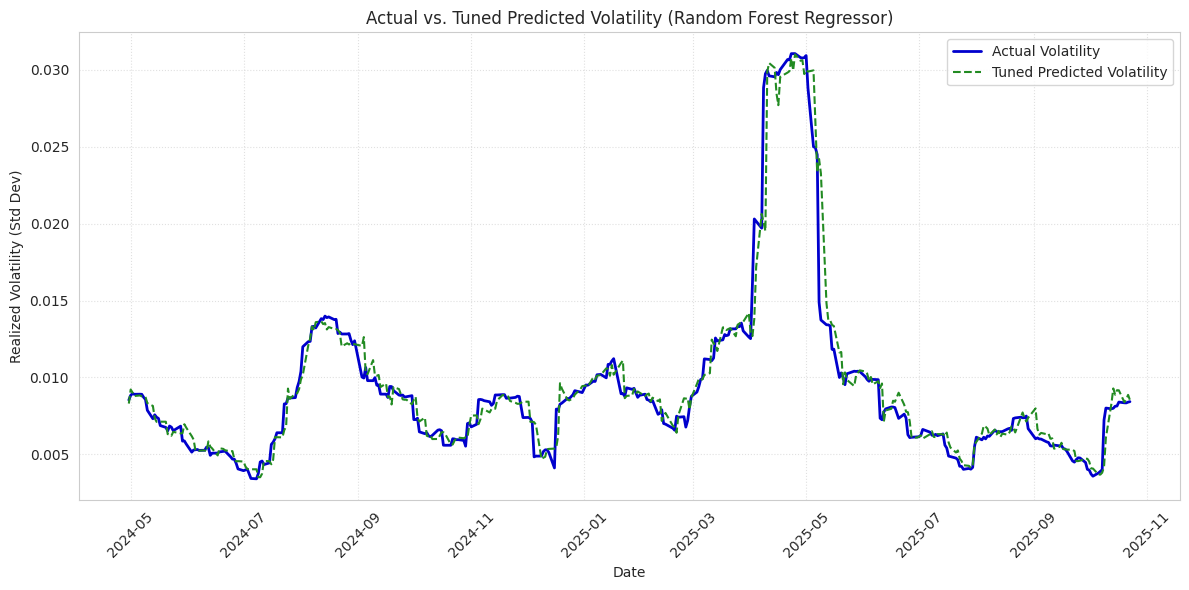


Final tuned model visualization saved to 'tuned_volatility_prediction_results.png'.


In [267]:
print("\n---  Final Model Training and Deployment ---")

# 7a. Evaluate the tuned model on the unseen test set
tuned_pred = best_rf_model.predict(X_test)

# 7b. Final Evaluation Metrics
final_rmse = np.sqrt(mean_squared_error(y_test, tuned_pred))
final_mae = mean_absolute_error(y_test, tuned_pred)
final_r2 = r2_score(y_test, tuned_pred)

print(f"Tuned Model Test RMSE: {final_rmse:.6f}")
print(f"Tuned Model Test MAE: {final_mae:.6f}")
print(f"Tuned Model Test R-squared (R2): {final_r2:.4f}")

#  Feature Importance (Critical for model interpretability)
feature_importances = pd.Series(best_rf_model.feature_importances_, index=FEATURES)
top_5_features = feature_importances.nlargest(5)

print("\nTop 5 Most Important Features:")
print(top_5_features.to_markdown(numalign="left", stralign="left"))

#  Out-of-Sample Forecasting for the last 5 days
# The last 5 rows of X_test represent the most recent available data for forecasting
# Convert X_test back to DataFrame to use .tail() and preserve index
forecast_X = X_test.tail(5)
forecast_dates = forecast_X.index

# Generate forecasts
final_forecasts = best_rf_model.predict(forecast_X)

print("\n---  Final Out-of-Sample Volatility Forecasts (Next 21-Day Period) ---")
forecast_df = pd.DataFrame({
    'Date_of_Forecast': forecast_dates,
    'Predicted_Volatility': final_forecasts
})
# Shift the Date_of_Forecast index by one day to represent the date the forecast is made *for*
forecast_df['Forecast_Made_For'] = forecast_df['Date_of_Forecast'] + pd.Timedelta(days=1)
forecast_df = forecast_df.set_index('Forecast_Made_For')
print(forecast_df[['Predicted_Volatility']].tail(5).to_markdown(numalign="left", stralign="left"))

# Visualization of Tuned Model Results (vs. Actual)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='mediumblue', linewidth=2)
plt.plot(y_test.index, tuned_pred, label='Tuned Predicted Volatility', color='forestgreen', linestyle='--', linewidth=1.5)
plt.title('Actual vs. Tuned Predicted Volatility (Random Forest Regressor)')
plt.xlabel('Date')
plt.ylabel('Realized Volatility (Std Dev)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('tuned_volatility_prediction_results.png')
plt.close()

print("\nFinal tuned model visualization saved to 'tuned_volatility_prediction_results.png'.")

In [268]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=None, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def _mean_squared_error(self, y):
        # Calculate MSE for a given set of target values
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)

    def _best_split(self, X, y):
        # Find the best feature and threshold to split the data
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        n_samples, n_feats = X.shape
        if self.n_features is None:
            self.n_features = n_feats

        # Randomly select a subset of features for each tree
        feature_indices = np.random.choice(n_feats, self.n_features, replace=False)

        for feature_idx in feature_indices:
            unique_values = np.unique(X[:, feature_idx])
            for threshold in unique_values:
                # Split the data into left and right subsets
                left_indices = X[:, feature_idx] <= threshold
                right_indices = X[:, feature_idx] > threshold

                y_left = y[left_indices]
                y_right = y[right_indices]

                if len(y_left) > 0 and len(y_right) > 0:
                    mse_left = self._mean_squared_error(y_left)
                    mse_right = self._mean_squared_error(y_right)

                    # Calculate the weighted average MSE
                    n_left = len(y_left)
                    n_right = len(y_right)
                    current_mse = (n_left * mse_left + n_right * mse_right) / (n_left + n_right)

                    if current_mse < best_mse:
                        best_mse = current_mse
                        best_feature = feature_idx
                        best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        # Recursive function to build the tree
        n_samples, _ = X.shape

        # Base cases for recursion
        if depth == self.max_depth or n_samples < self.min_samples_split or len(np.unique(y)) == 1:
            return Node(value=np.mean(y))

        feature, threshold = self._best_split(X, y)

        if feature is None:
            return Node(value=np.mean(y))

        # Split data and build sub-trees
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature, threshold, left_tree, right_tree)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict_tree(self, x, tree):
        if tree.value is not None:
            return tree.value

        if x[tree.feature] <= tree.threshold:
            return self._predict_tree(x, tree.left)
        else:
            return self._predict_tree(x, tree.right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.root) for x in X])

class RandomForestRegressor:
    def __init__(self, n_estimators=100, min_samples_split=10, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def _get_bootstrap_sample(self, X, y):
        # Create a bootstrap sample (random sampling with replacement)
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape
        # Set max_features if not specified
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))

        # Build each tree
        for _ in range(self.n_estimators):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_features=self.max_features
            )
            X_sample, y_sample = self._get_bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Collect predictions from all trees and average them
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)




Gradient Boosting Regression Trees (GBRT) with GridSearchCV

In [269]:
from sklearn.model_selection import TimeSeriesSplit,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import randint
from sklearn.linear_model import Ridge, RidgeCV,Lasso,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [270]:
N_ITER_SEARCH = 100  # Number of parameter settings that are sampled for tuning

X = df_ml[FEATURES]
y = df_ml[TARGET]

print(f"ML-Ready Data Shape: X={X.shape}, y={y.shape}")

# ---- Date-wise Split ----
split_date = "2024-04-30"

# Ensure the index is in datetime format
df_ml.index = pd.to_datetime(df_ml.index)

# Split data based on date
X_train = X.loc[:split_date]
y_train = y.loc[:split_date]

X_test = X.loc[split_date:]
y_test = y.loc[split_date:]

print(f"Training data till: {split_date}")
print(f"Testing data after: {split_date}")

print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

# ---- Data Cleaning: Handle NaN and Infinite Values ----
import numpy as np

print("\nChecking for NaN or Inf values in training and test sets...")

# Replace inf/-inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in either X or y
valid_train_idx = X_train.dropna().index.intersection(y_train.dropna().index)
valid_test_idx = X_test.dropna().index.intersection(y_test.dropna().index)

X_train = X_train.loc[valid_train_idx]
y_train = y_train.loc[valid_train_idx]

X_test = X_test.loc[valid_test_idx]
y_test = y_test.loc[valid_test_idx]

print("Shapes after cleaning:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


ML-Ready Data Shape: X=(3692, 10), y=(3692,)
Training data till: 2024-04-30
Testing data after: 2024-04-30
Total Samples: 3692
Training Samples: 3320
Testing Samples: 373

Checking for NaN or Inf values in training and test sets...
Shapes after cleaning:
X_train: (3319, 10), y_train: (3319,)
X_test: (373, 10), y_test: (373,)


In [271]:
print("Gradient Boosting Regression Trees(GBRT) with CV Tuning")
gbrt = GradientBoostingRegressor(random_state=42)
#Define parameters for cross validation
param_grid = {
    'n_estimators':[200, 500],
    'max_depth': [3,5],
    'learning_rate': [0.01, 0.1]
}

gbrt_gs_model = GridSearchCV(
    estimator=gbrt,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  #  Finds the combination of hyperparameters that minimizes the MSE
    cv=tscv,               # Use TimeSeriesSplit
    n_jobs= -1,             # Use all processors
    verbose=2
)

Gradient Boosting Regression Trees(GBRT) with CV Tuning


Train the model

In [272]:
gbrt_gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [273]:
# Extract the best parameters
best_params_gbrt = gbrt_gs_model.best_params_
print(f"Optimal GBRT Hyperparameters found by CV: {best_params_gbrt}")

# Predict and evaluate with the best model
RV_pred_gbrt = gbrt_gs_model.predict(X_test)
mse_gbrt = mean_squared_error(y_test, RV_pred_gbrt)
r2_gbrt = r2_score(y_test, RV_pred_gbrt)

print(f"Test Mean Squared Error (MSE) with Optimal GBRT: {mse_gbrt:.6f}")
print(f"Test R-squared Score (R2) with Optimal GBRT: {r2_gbrt:.4f}")

Optimal GBRT Hyperparameters found by CV: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Test Mean Squared Error (MSE) with Optimal GBRT: 0.000002
Test R-squared Score (R2) with Optimal GBRT: 0.9463


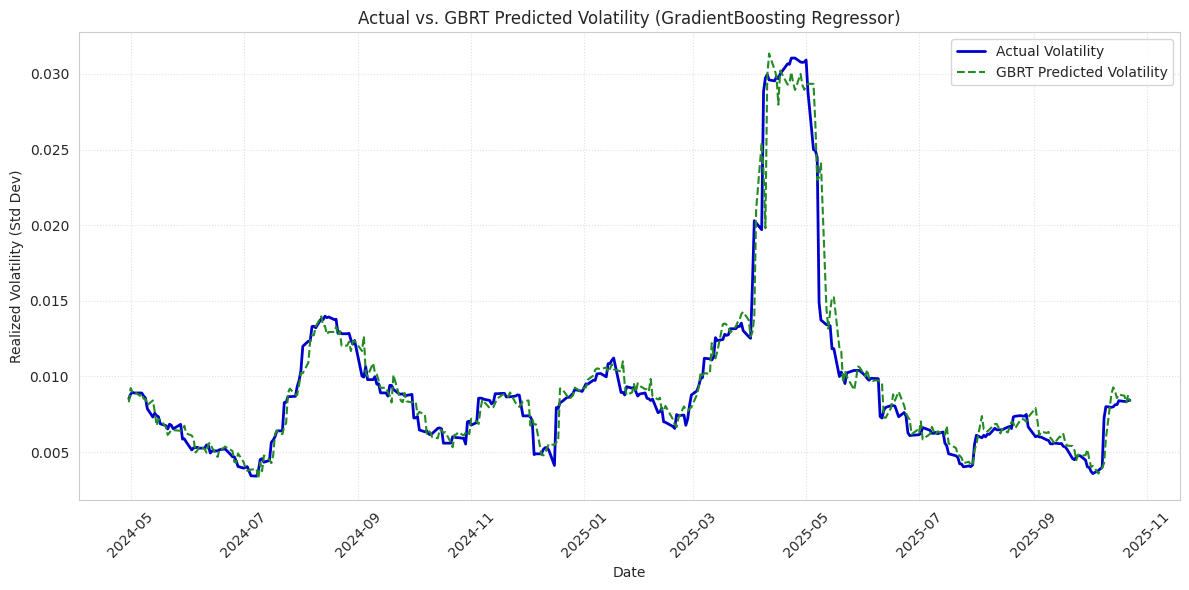

In [274]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='mediumblue', linewidth=2)
plt.plot(y_test.index, RV_pred_gbrt, label='GBRT Predicted Volatility', color='forestgreen', linestyle='--', linewidth=1.5)
plt.title('Actual vs. GBRT Predicted Volatility (GradientBoosting Regressor)')
plt.xlabel('Date')
plt.ylabel('Realized Volatility (Std Dev)')
plt.legend()
plt.grid(False, linestyle=':', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A basic Ridge Regression with a fixed Lamda (alpha_fixed =1)

In [275]:
print('Ridge Regression Baseline ')
alpha_fixed = 1.0
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=alpha_fixed, random_state=42))

Ridge Regression Baseline 


Train the model

In [276]:
ridge_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

Predict and evaluate

In [277]:
RV_pred_fixed = ridge_model.predict(X_test)
mse_fixed = mean_squared_error(y_test,RV_pred_fixed)
r2_fixed = r2_score(y_test ,RV_pred_fixed)
print(f"Test Mean Squared Error (MSE) : {mse_fixed : .6f}")
print(f"Test R-Squared Score (R2) : {r2_fixed : .4f}")

Test Mean Squared Error (MSE) :  0.000002
Test R-Squared Score (R2) :  0.9472


Ridge regression with Time-Series Cross-Validation for Optimal Alpha

In [278]:
print("Ridge Regression with Time series Cross-Validation")
alphas = np.logspace(-4,4,20)
tscv = TimeSeriesSplit(n_splits=5) # Use 5-fold Time Series

# RidgeCV automatically selects the best alpha from the given list.
# We use a pipeline for scaling, which is crucial for Ridge.
ridge_cv_model = make_pipeline(StandardScaler(), RidgeCV(
    alphas=alphas,
    cv=tscv,  # Use TimeSeriesSplit for proper financial CV
    scoring='neg_mean_squared_error' # Optimize for minimizing MSE
))


Ridge Regression with Time series Cross-Validation


Train the model (this performs the cross-validation)

In [279]:
ridge_cv_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                         scoring='neg_mean_squared_error'))])

Extract the best alpha(lamda) found by the cross-validation

In [280]:
best_alpha = ridge_cv_model.named_steps['ridgecv'].alpha_
coefficients_ridge = ridge_cv_model.named_steps['ridgecv'].coef_

 Predict and evaluate with the best model

In [281]:
RV_cv_pred = ridge_cv_model.predict(X_test)
mse_cv = mean_squared_error(y_test, RV_cv_pred)
r2_cv = r2_score(y_test, RV_cv_pred)

print(f"Optimal Tuning Parameter (lambda/alpha): {best_alpha:.4f}")
print(f"Test Mean Squared Error (MSE) with Optimal Alpha: {mse_cv:.6f}")
print(f"Test R-squared Score (R2) with Optimal Alpha: {r2_cv:.4f}")

Optimal Tuning Parameter (lambda/alpha): 4.2813
Test Mean Squared Error (MSE) with Optimal Alpha: 0.000002
Test R-squared Score (R2) with Optimal Alpha: 0.9472


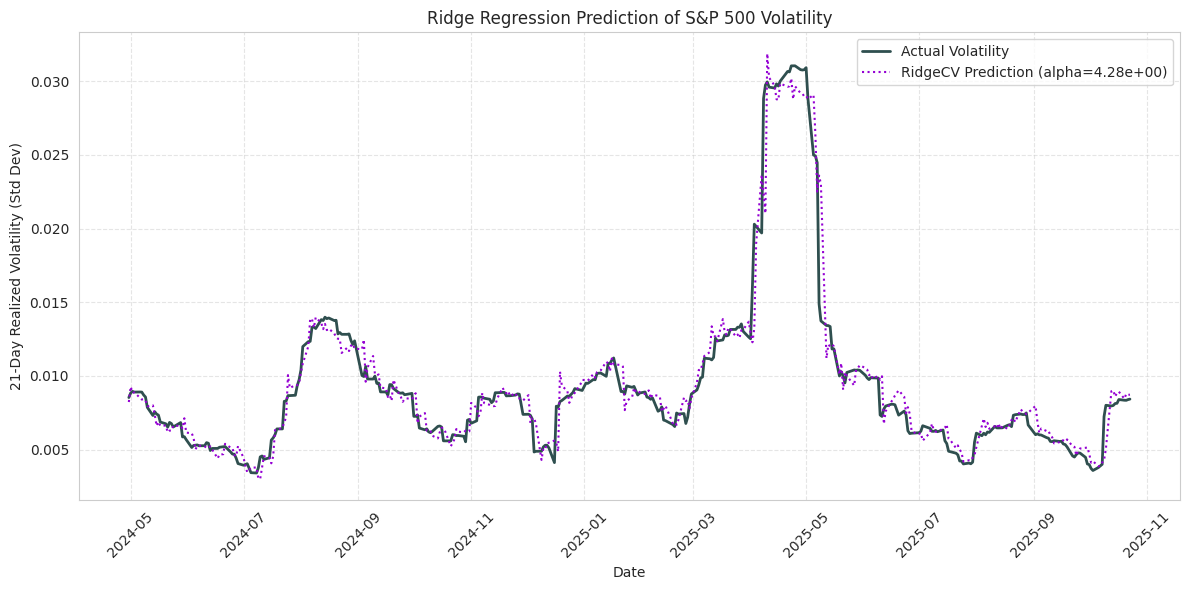


Visualization of RidgeCV prediction saved to 'ridge_volatility_prediction_comparison.png'.


In [282]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='darkslategray', linewidth=2)
plt.plot(y_test.index, RV_cv_pred, label=f'RidgeCV Prediction (alpha={best_alpha:.2e})', color='darkviolet', linestyle=':', linewidth=1.5)
plt.title('Ridge Regression Prediction of S&P 500 Volatility')
plt.xlabel('Date')
plt.ylabel(f'{VOLATILITY_WINDOW}-Day Realized Volatility (Std Dev)')
plt.legend()
plt.grid(False, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('ridge_volatility_prediction_comparison.png')
plt.close()

print("\nVisualization of RidgeCV prediction saved to 'ridge_volatility_prediction_comparison.png'.")


In [283]:
print("\n--- Ridge Variable Selection (Non-Zero Coefficients) ---")
feature_coefs = pd.Series(coefficients_ridge, index=FEATURES)
non_zero_coefs = feature_coefs[feature_coefs != 0].sort_values(ascending=False)

print(f"Total features: {len(FEATURES)}")
print(f"Features set to zero by RIDGE: {len(FEATURES) - len(non_zero_coefs)}")
print("\nNon-Zero Coefficients:")
print(non_zero_coefs)


--- Ridge Variable Selection (Non-Zero Coefficients) ---
Total features: 10
Features set to zero by RIDGE: 0

Non-Zero Coefficients:
lagged_volatility    0.005837
volatility_change    0.000197
log_avg_volume       0.000160
BB_percent          -0.000020
return_lag_5        -0.000027
return_lag_2        -0.000034
return_lag_1        -0.000046
return_lag_10       -0.000066
RSI                 -0.000097
MACD_Diff           -0.000252
dtype: float64


In [284]:
forecast_X = X_test.tail(5)
forecast_dates = forecast_X.index

# Generate forecasts
final_forecasts = ridge_cv_model.predict(forecast_X)

print("\n--- 7e. Final Out-of-Sample Volatility Forecasts (Next 21-Day Period) ---")
forecast_df = pd.DataFrame({
    'Date_of_Forecast': forecast_dates,
    'Predicted_Volatility': final_forecasts
})
# Shift the Date_of_Forecast index by one day to represent the date the forecast is made *for*
forecast_df['Forecast_Made_For'] = forecast_df['Date_of_Forecast'] + pd.Timedelta(days=1)
forecast_df = forecast_df.set_index('Forecast_Made_For')
print(forecast_df[['Predicted_Volatility']].tail(5).to_markdown(numalign="left", stralign="left"))


--- 7e. Final Out-of-Sample Volatility Forecasts (Next 21-Day Period) ---
| Forecast_Made_For   | Predicted_Volatility   |
|:--------------------|:-----------------------|
| 2025-10-18 00:00:00 | 0.00893422             |
| 2025-10-21 00:00:00 | 0.00845232             |
| 2025-10-22 00:00:00 | 0.00878334             |
| 2025-10-23 00:00:00 | 0.00871413             |
| 2025-10-24 00:00:00 | 0.00873303             |


LASSO Regression with Time-Series Cross-Validation

In [285]:
print("LASSO regression with Time-Series Cross-Validation")
# Set the range of lambda (alpha) values to check
# For LASSO, it is critical to start the range near zero for high regularization.
alphas_1 = np.logspace(-6,0,100)
tscv = TimeSeriesSplit(n_splits=5)

LASSO regression with Time-Series Cross-Validation


In [286]:
lasso_cv_model = make_pipeline(StandardScaler(), LassoCV(
    alphas=alphas_1,
    cv=tscv,  # Ue Timeseroies split for proper financial CV
    random_state=42, # for reproducibility
    max_iter = 10000, # Increase max iterations for convergence
    selection = 'random'  # faster convergence for many features
))

Train the model

In [287]:
lasso_cv_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840e-06, 2.00923300e-06, 2.31012970e-06, 2.65608778e-06,
       3.05385551e-06, 3.51119173e-06, 4.03701726e-06, 4.64158883e-06,
       5.33669923e-06, 6.13590727e-06, 7.05480231e-06, 8.11130831e-06,
       9.32603347e-06, 1.07226722...
       1.23284674e-01, 1.41747416e-01, 1.62975083e-01, 1.87381742e-01,
       2.15443469e-01, 2.47707636e-01, 2.84803587e-01, 3.27454916e-01,
       3.76493581e-01, 4.32876128e-01, 4.97702356e-01, 5.72236766e-01,
       6.57933225e-01, 7.56463328e-01, 8.69749003e-01, 1.00000000e+00]),
                         cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                         max_iter=10000, random_state=42,
                         selection='random'))])

Extract the best alpha (lambda) found by the cross-validation

In [288]:
best_alpha_lasso = lasso_cv_model.named_steps['lassocv'].alpha_
coefficients = lasso_cv_model.named_steps['lassocv'].coef_

Predict and evaluate

In [289]:
RV_cv_pred_lasso = lasso_cv_model.predict(X_test)
mse_cv_lasso = mean_squared_error(y_test, RV_cv_pred_lasso)
r2_cv_lasso = r2_score(y_test, RV_cv_pred)

print(f"Optimal Tuning Parameter (lambda/alpha): {best_alpha_lasso:.6f}")
print(f"Test Mean Squared Error (MSE) with Optimal Alpha: {mse_cv_lasso:.6f}")
print(f"Test R-squared Score (R2) with Optimal Alpha: {r2_cv_lasso:.4f}")

Optimal Tuning Parameter (lambda/alpha): 0.000007
Test Mean Squared Error (MSE) with Optimal Alpha: 0.000002
Test R-squared Score (R2) with Optimal Alpha: 0.9472


In [290]:
print("\n--- LASSO Variable Selection (Non-Zero Coefficients) ---")
feature_coefs = pd.Series(coefficients, index=FEATURES)
non_zero_coefs = feature_coefs[feature_coefs != 0].sort_values(ascending=False)

print(f"Total features: {len(FEATURES)}")
print(f"Features set to zero by LASSO: {len(FEATURES) - len(non_zero_coefs)}")
print("\nNon-Zero Coefficients:")
print(non_zero_coefs)


--- LASSO Variable Selection (Non-Zero Coefficients) ---
Total features: 10
Features set to zero by LASSO: 0

Non-Zero Coefficients:
lagged_volatility    0.005845
volatility_change    0.000192
log_avg_volume       0.000152
return_lag_5        -0.000019
return_lag_2        -0.000025
BB_percent          -0.000029
return_lag_1        -0.000039
return_lag_10       -0.000058
RSI                 -0.000087
MACD_Diff           -0.000255
dtype: float64


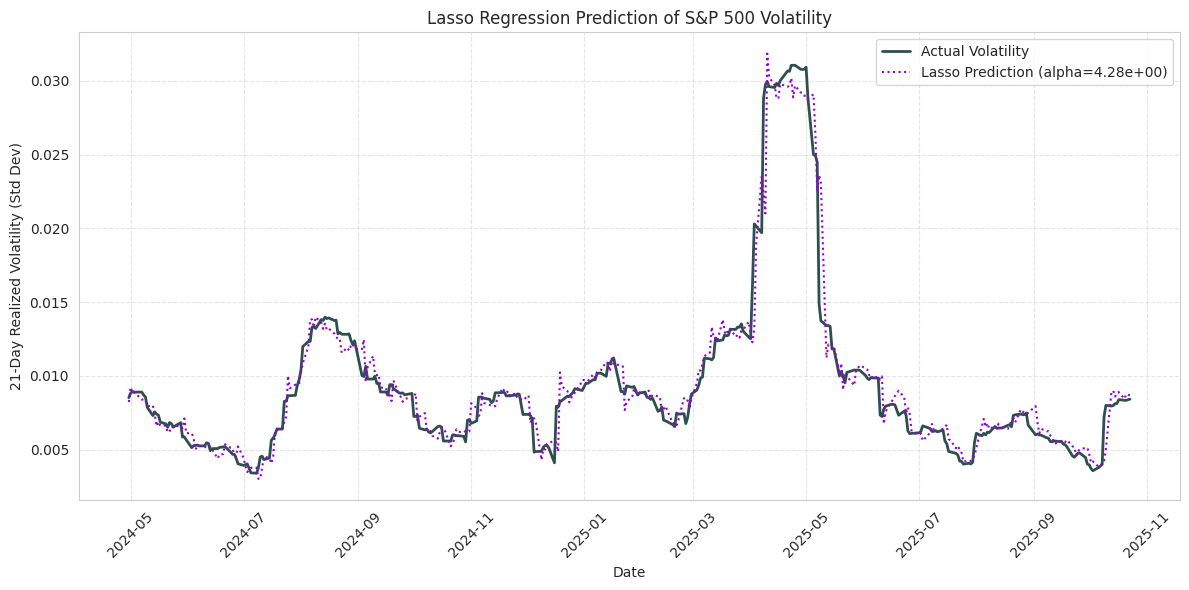


Visualization of Lasso prediction saved to 'ridge_volatility_prediction_comparison.png'.


In [291]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='darkslategray', linewidth=2)
plt.plot(y_test.index, RV_cv_pred_lasso, label=f'Lasso Prediction (alpha={best_alpha:.2e})', color='darkviolet', linestyle=':', linewidth=1.5)
plt.title('Lasso Regression Prediction of S&P 500 Volatility')
plt.xlabel('Date')
plt.ylabel(f'{VOLATILITY_WINDOW}-Day Realized Volatility (Std Dev)')
plt.legend()
plt.grid(False, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('lasso_volatility_prediction_comparison.png')
plt.close()

print("\nVisualization of Lasso prediction saved to 'ridge_volatility_prediction_comparison.png'.")



--- Building Stacking Ensemble Model ---

Stacking Ensemble Test Mean Squared Error (MSE): 0.000002
Stacking Ensemble Test R-squared Score (R2): 0.9474


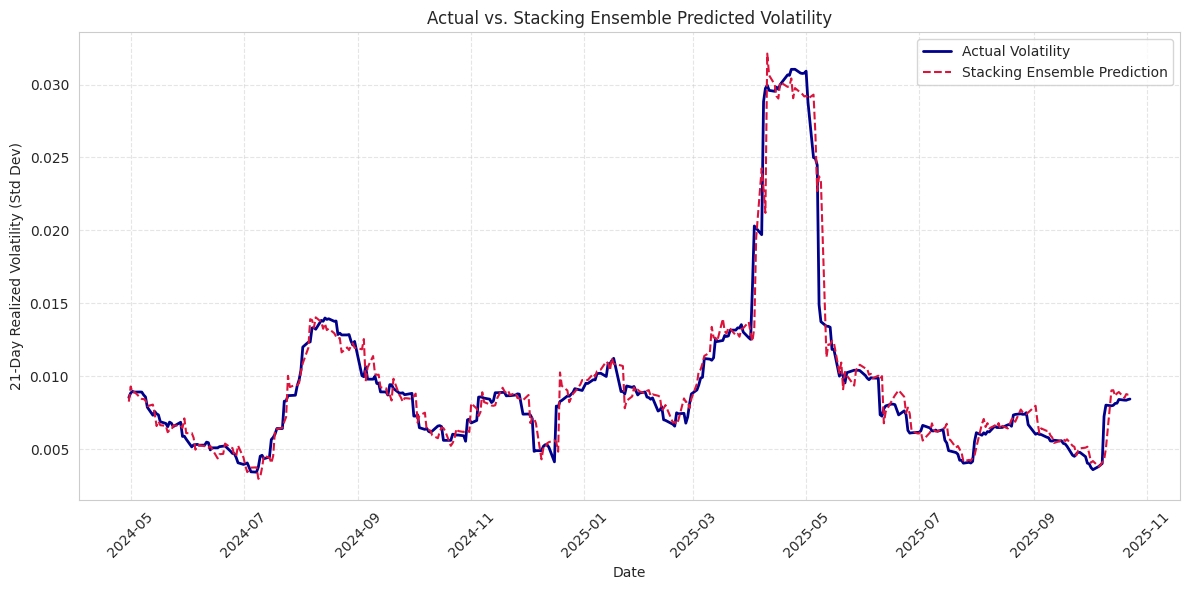


Final Stacking Ensemble visualization saved to 'stacking_ensemble_prediction.png'.


In [292]:
"""STACKING ENSEMBLE MODEL """

print("\n--- Building Stacking Ensemble Model ---")

from sklearn.ensemble import StackingRegressor

# Recreate tuned versions of your models
rf_final = best_rf_model  # From your RandomizedSearchCV
gbrt_final = gbrt_gs_model.best_estimator_  # From your GBRT tuning
ridge_final = ridge_cv_model  # Best RidgeCV model
lasso_final = lasso_cv_model  # Best LassoCV model

# Create the Stacking Regressor
stack_model = StackingRegressor(
    estimators=[
        ('rf', rf_final),
        ('gbrt', gbrt_final),
        ('ridge', ridge_final),
        ('lasso', lasso_final)
    ],
    final_estimator=RidgeCV(alphas=np.logspace(-3, 3, 7)),
    cv=5,
    n_jobs=-1
)

# Train the Stacking model
stack_model.fit(X_train, y_train)

# Predict on test set
stack_pred = stack_model.predict(X_test)

# Evaluate performance
mse_stack = mean_squared_error(y_test, stack_pred)
r2_stack = r2_score(y_test, stack_pred)

print(f"\nStacking Ensemble Test Mean Squared Error (MSE): {mse_stack:.6f}")
print(f"Stacking Ensemble Test R-squared Score (R2): {r2_stack:.4f}")

# Plot comparison vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='darkblue', linewidth=2)
plt.plot(y_test.index, stack_pred, label='Stacking Ensemble Prediction', color='crimson', linestyle='--', linewidth=1.5)
plt.title('Actual vs. Stacking Ensemble Predicted Volatility')
plt.xlabel('Date')
plt.ylabel(f'{VOLATILITY_WINDOW}-Day Realized Volatility (Std Dev)')
plt.legend()
plt.grid(False, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('stacking_ensemble_prediction.png')
plt.close()

print("\nFinal Stacking Ensemble visualization saved to 'stacking_ensemble_prediction.png'.")



--- FINAL MODEL PERFORMANCE COMPARISON ---
|                       |  MSE  |    R2    |
|:---------------------:|:-----:|:--------:|
| Random Forest (Tuned) | 2e-06 | 0.946003 |
|     GBRT (Tuned)      | 2e-06 | 0.946288 |
|        RidgeCV        | 2e-06 |  0.9472  |
|        LassoCV        | 2e-06 |  0.9472  |
|   Stacking Ensemble   | 2e-06 | 0.947393 |

Model comparison results saved to 'model_comparison_results.csv'.


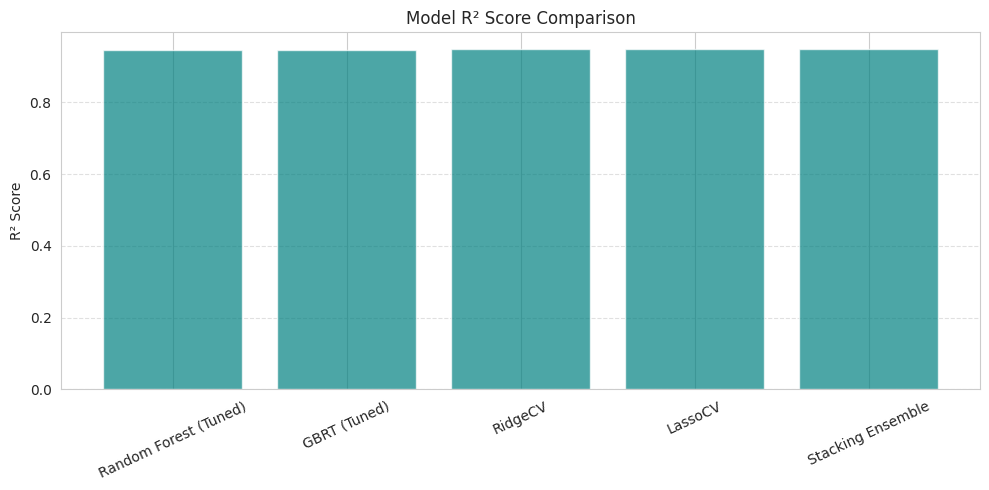

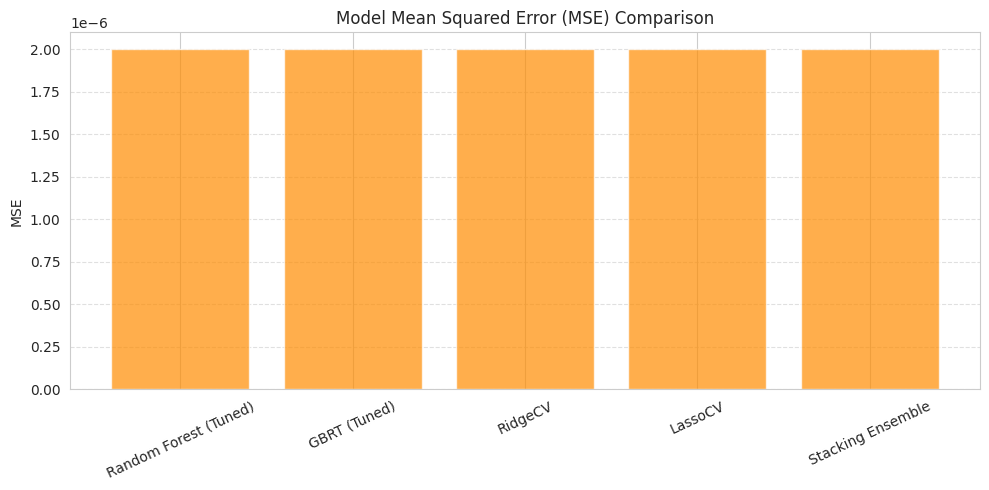

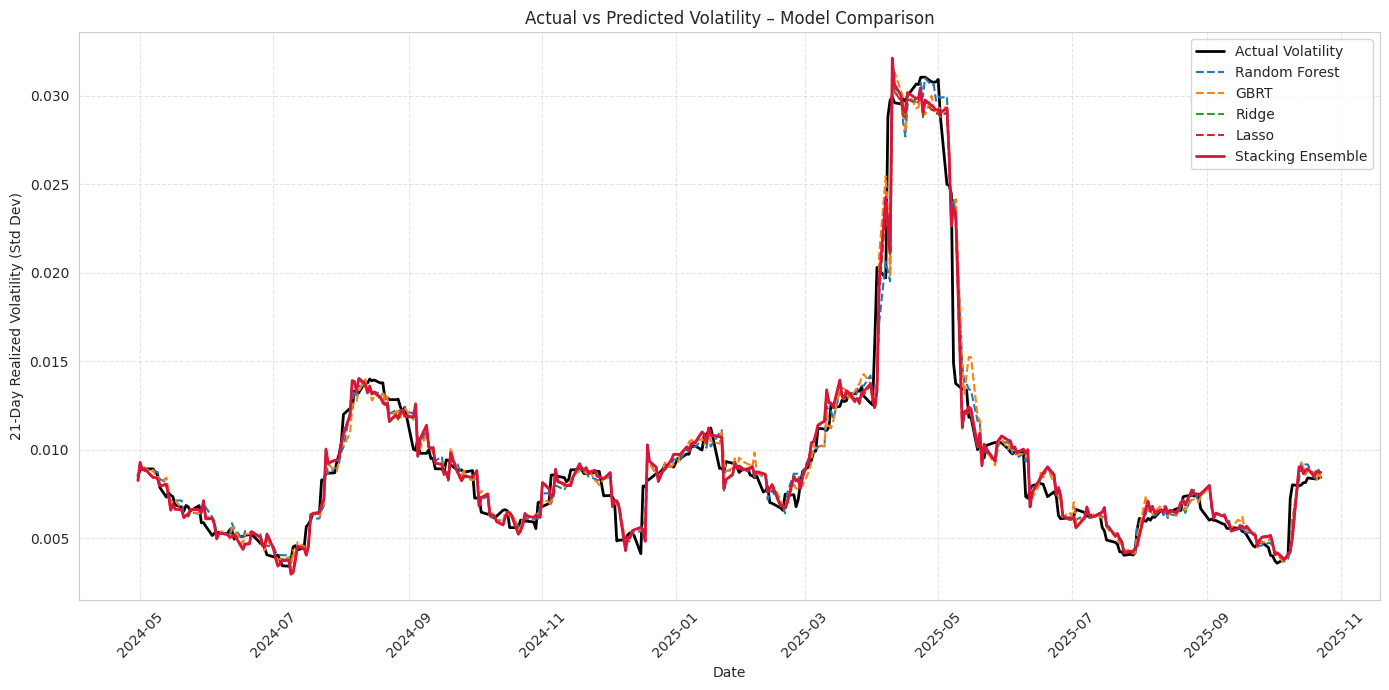


All comparison visualizations saved:
 - model_r2_comparison_barplot.png
 - model_mse_comparison_barplot.png
 - all_models_comparison_plot.png


In [293]:
""" MODEL PERFORMANCE COMPARISON (All 5 Models)"""

# Collect all model results
results = {
    "Random Forest (Tuned)": {
        "MSE": mean_squared_error(y_test, tuned_pred),
        "R2": r2_score(y_test, tuned_pred)
    },
    "GBRT (Tuned)": {
        "MSE": mse_gbrt,
        "R2": r2_gbrt
    },
    "RidgeCV": {
        "MSE": mse_cv,
        "R2": r2_cv
    },
    "LassoCV": {
        "MSE": mse_cv_lasso,
        "R2": r2_cv_lasso
    },
    "Stacking Ensemble": {
        "MSE": mse_stack,
        "R2": r2_stack
    }
}

# Convert to DataFrame for pretty display
results_df = pd.DataFrame(results).T
results_df = results_df.round(6)
print("\n--- FINAL MODEL PERFORMANCE COMPARISON ---")
print(results_df.to_markdown(numalign="center", stralign="center"))

# Save the results
results_df.to_csv("model_comparison_results.csv", index=True)
print("\nModel comparison results saved to 'model_comparison_results.csv'.")

""" Bar Chart Comparison of Model Performance"""

plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df["R2"], color='teal', alpha=0.7)
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('model_r2_comparison_barplot.png')
plt.close()

plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df["MSE"], color='darkorange', alpha=0.7)
plt.title("Model Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('model_mse_comparison_barplot.png')
plt.close()

""" Combined Actual vs Predicted Plot (All Models)"""

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Volatility', color='black', linewidth=2)
plt.plot(y_test.index, tuned_pred, label='Random Forest', linestyle='--', linewidth=1.5)
plt.plot(y_test.index, RV_pred_gbrt, label='GBRT', linestyle='--', linewidth=1.5)
plt.plot(y_test.index, RV_cv_pred, label='Ridge', linestyle='--', linewidth=1.5)
plt.plot(y_test.index, RV_cv_pred_lasso, label='Lasso', linestyle='--', linewidth=1.5)
plt.plot(y_test.index, stack_pred, label='Stacking Ensemble', linestyle='-', linewidth=2, color='crimson')
plt.title('Actual vs Predicted Volatility – Model Comparison')
plt.xlabel('Date')
plt.ylabel(f'{VOLATILITY_WINDOW}-Day Realized Volatility (Std Dev)')
plt.legend()
plt.grid(False, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('all_models_comparison_plot.png')
plt.close()

print("\nAll comparison visualizations saved:")
print(" - model_r2_comparison_barplot.png")
print(" - model_mse_comparison_barplot.png")
print(" - all_models_comparison_plot.png")



### Prediction

In [299]:
import joblib

joblib.dump(stack_model, "/content/stacking_model.pkl")


['/content/stacking_model.pkl']

In [300]:
df = pd.read_csv('/content/SP500_2011_2025.csv')
new_df = pd.read_csv('/content/new_df.csv')


 Last available date in data: 2025-10-24

--- Predicted Volatility for 27–31 Oct 2025 ---
| Date       |   Predicted_Volatility |
|:-----------|-----------------------:|
| 2025-10-27 |             0.00834395 |
| 2025-10-28 |             0.00835703 |
| 2025-10-29 |             0.00837956 |
| 2025-10-30 |             0.00840166 |
| 2025-10-31 |             0.00832954 |


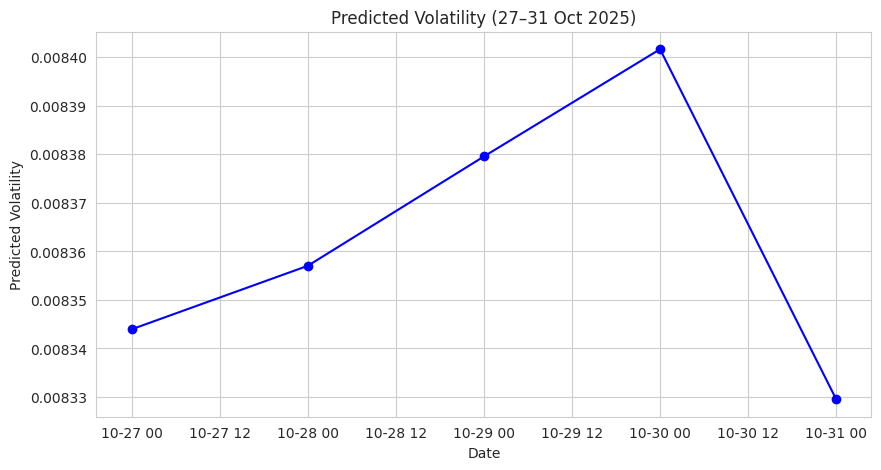

In [301]:
import pandas as pd
import numpy as np
import ta
from datetime import timedelta
import matplotlib.pyplot as plt


df_future = df.copy()
df_future['Date'] = pd.to_datetime(df_future['Date'], dayfirst=True)
df_future.sort_values('Date', inplace=True)
df_future.reset_index(drop=True, inplace=True)

# =====================================================
#   Compute base features before prediction
# =====================================================
df_future['log_return'] = np.log(df_future['Close'] / df_future['Close'].shift(1))
df_future['realized_volatility'] = df_future['log_return'].rolling(window=21).std()
df_future['lagged_volatility'] = df_future['realized_volatility'].shift(1)
df_future['volatility_change'] = df_future['lagged_volatility'].diff(1)

for lag in [1, 2, 5, 10]:
    df_future[f'return_lag_{lag}'] = df_future['log_return'].shift(lag)

df_future['RSI'] = ta.momentum.rsi(df_future['Close'], window=14)
macd_result = ta.trend.MACD(df_future['Close'], window_fast=12, window_slow=26, window_sign=9)
df_future['MACD_Diff'] = macd_result.macd_diff()

bb = ta.volatility.BollingerBands(df_future['Close'], window=20, window_dev=2)
df_future['BB_percent'] = bb.bollinger_pband()
df_future['log_avg_volume'] = np.log(df_future['Volume'].replace(0, np.nan)).fillna(method='ffill')

df_future.dropna(inplace=True)
df_future.reset_index(drop=True, inplace=True)

# =====================================================
#  Confirm last available date
# =====================================================
last_date = df_future['Date'].max()
print(f" Last available date in data: {last_date.date()}")

# =====================================================
#  Generate 27–31 Oct 2025 future dates
# =====================================================
future_dates = pd.date_range(start='2025-10-27', end='2025-10-31', freq='D')

# Extract last known values
last_close = df_future['Close'].iloc[-1]
last_volume = df_future['Volume'].iloc[-1]
last_volatility = df_future['realized_volatility'].iloc[-1]

# =====================================================
#  Iteratively generate features & predict
# =====================================================
predictions = []

for d in future_dates:
    # Synthetic new day
    new_row = {
        'Date': d,
        'Close': last_close,
        'Open': last_close,
        'High': last_close,
        'Low': last_close,
        'Volume': last_volume
    }
    df_future = pd.concat([df_future, pd.DataFrame([new_row])], ignore_index=True)

    # --- Update all features dynamically ---
    df_future['log_return'] = np.log(df_future['Close'] / df_future['Close'].shift(1))
    df_future['realized_volatility'] = df_future['log_return'].rolling(window=21).std()
    df_future['lagged_volatility'] = df_future['realized_volatility'].shift(1)
    df_future['volatility_change'] = df_future['lagged_volatility'].diff(1)

    for lag in [1, 2, 5, 10]:
        df_future[f'return_lag_{lag}'] = df_future['log_return'].shift(lag)

    df_future['RSI'] = ta.momentum.rsi(df_future['Close'], window=14)
    macd_result = ta.trend.MACD(df_future['Close'], window_fast=12, window_slow=26, window_sign=9)
    df_future['MACD_Diff'] = macd_result.macd_diff()

    bb = ta.volatility.BollingerBands(df_future['Close'], window=20, window_dev=2)
    df_future['BB_percent'] = bb.bollinger_pband()

    df_future['log_avg_volume'] = np.log(df_future['Volume'].replace(0, np.nan)).fillna(method='ffill')

    # Prepare feature row for this new date
    X_latest = df_future[FEATURES].iloc[[-1]].fillna(method='ffill').fillna(method='bfill')

    # Predict volatility
    pred_vol = stack_model.predict(X_latest)[0]

    # Store prediction
    predictions.append({'Date': d.date(), 'Predicted_Volatility': pred_vol})

    # Update values for next loop
    last_volatility = pred_vol
    df_future.at[df_future.index[-1], 'realized_volatility'] = pred_vol
    df_future.at[df_future.index[-1], 'lagged_volatility'] = pred_vol

# =====================================================
#  Display predictions
# =====================================================
pred_df = pd.DataFrame(predictions)
print("\n--- Predicted Volatility for 27–31 Oct 2025 ---")
print(pred_df.to_markdown(index=False))

# =====================================================
# Plot results
# =====================================================
plt.figure(figsize=(10,5))
plt.plot(pred_df['Date'], pred_df['Predicted_Volatility'], marker='o', color='blue')
plt.title('Predicted Volatility (27–31 Oct 2025)')
plt.xlabel('Date')
plt.ylabel('Predicted Volatility')
plt.grid(True)
plt.show()


for comparision


In [302]:
new_df = pd.read_csv('/content/new_df.csv')



--- Predicted vs Actual Volatility (27–31 Oct 2025) ---
        Date  Predicted_Volatility  Actual_Volatility
0 2025-10-27              0.008344           0.003072
1 2025-10-28              0.008357           0.007021
2 2025-10-29              0.008380           0.001647
3 2025-10-30              0.008402           0.007008
4 2025-10-31              0.008330           0.008887


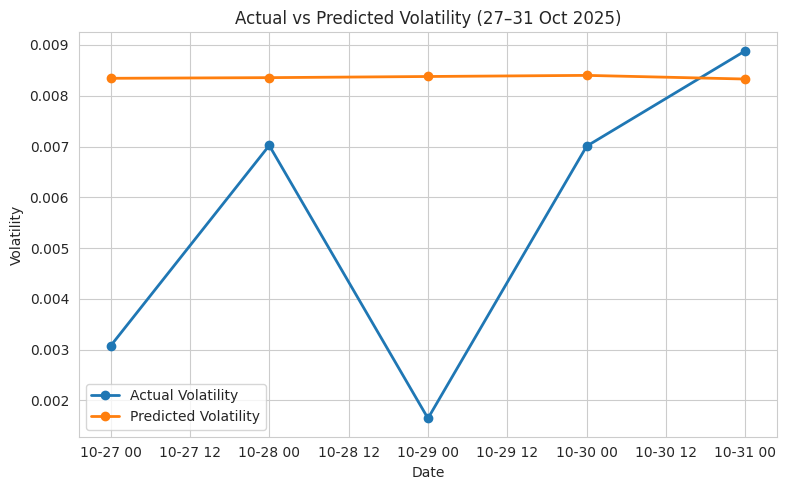

In [303]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ============================================
#  Prepare DataFrames
# ============================================

# Ensure both DataFrames have proper datetime column names
pred_df['Date'] = pd.to_datetime(pred_df['Date'])
new_df['Date'] = pd.to_datetime(new_df['Date'], dayfirst=True)

# Make sure new_df contains the actual realized volatility column
# If not already present, calculate it using Close prices:
if 'realized_volatility' not in new_df.columns:
    new_df['returns'] = np.log(new_df['Close'] / new_df['Close'].shift(1))
    new_df['realized_volatility'] = new_df['returns'].rolling(window=2).std()  # short window for daily vol
    new_df.dropna(inplace=True)

# Keep only the required columns
actual_df = new_df[['Date', 'realized_volatility']].copy()
actual_df.rename(columns={'realized_volatility': 'Actual_Volatility'}, inplace=True)

# ============================================
#  Merge Predicted and Actual
# ============================================

comparison_df = pd.merge(pred_df, actual_df, on='Date', how='inner')
comparison_df = comparison_df.sort_values('Date').reset_index(drop=True)

print("\n--- Predicted vs Actual Volatility (27–31 Oct 2025) ---")
print(comparison_df)


# ============================================
#  Visualization
# ============================================

plt.figure(figsize=(8,5))
plt.plot(comparison_df['Date'], comparison_df['Actual_Volatility'], marker='o', label='Actual Volatility', linewidth=2)
plt.plot(comparison_df['Date'], comparison_df['Predicted_Volatility'], marker='o', label='Predicted Volatility', linewidth=2)
plt.title('Actual vs Predicted Volatility (27–31 Oct 2025)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
